The numerical solution for the slope, "a", is: 2.499922.
The numerical solution for the y-intercept, "b"," is: -0.161655.


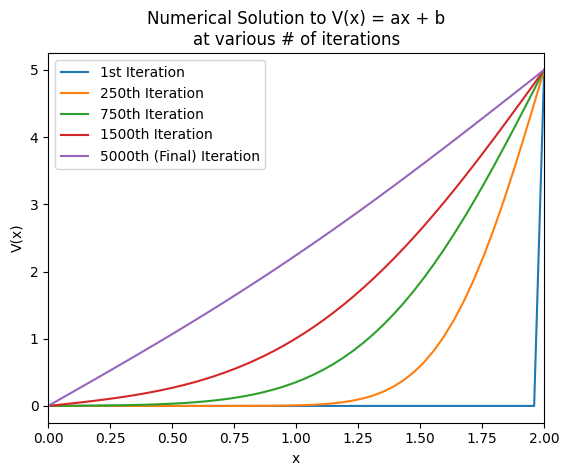

In [1]:
#3a-c
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize
import math

#for input slope and intercept, return y = mx + b
def linear_model(x,param):
    slope, intercept = param
    result = slope*x + intercept #mx + b
    return result

#reduced chi formula from lecture notes
def reduced_chi(param, *args):
    slope, intercept = param
    x, y_data, uncertainty = args
    y_model = linear_model(x, (slope, intercept))
    residuals = (y_model - y_data)/uncertainty
    chi2 = np.sum( residuals**2/len(y_data) )
    return chi2

#this does the array splicing algorithm every loop. Equation (26) from lab manual
def update_array(arr):
    updated_arr = arr.copy()
    updated_arr[1:-1] = (arr[:-2] + arr[2:]) / 2.0
    return updated_arr

#this is making two arrays, one is the x axis from 0-2 evenly spaced, the other is an empty matrix for the y axis that is the same size as the x-axis
x = np.linspace(0,2,100)
V = np.zeros(len(x))

#this is setting the boundary variables for the y-axis, as well as creating a loop variable
V[0],V[-1] = 0.0, 5.0

#this repeats the "splicing" process 5000 times
for j in range(5000):
    V = update_array(V)
    if j == 0: 
        V_0 = V.copy()
    if j == 250:
        V_1 = V.copy()
    if j == 750:
        V_2 = V.copy()
    if j == 1500:
        V_3 = V.copy()

#this calls the linear_model function to make a line of best fit
slope0, intercept0 = 2.3, 0.0 #initial predictions of slope and intercept
result = scipy.optimize.minimize(reduced_chi,[slope0, intercept0],(x,V,1), method="Nelder-Mead") #optimize method

m = result.x[0] #predicted slope from minimize function
b = result.x[1] #predicted y-intercept from minimize function

print('The numerical solution for the slope, "a", is: %0.6f.'% m)
print('The numerical solution for the y-intercept, "b"," is: %0.6f.'%b)

#plotting figure
plt.figure()
plt.plot(x, V_0)
plt.plot(x, V_1)
plt.plot(x, V_2)
plt.plot(x, V_3)
plt.plot(x, V)
plt.xlim(0,2.0)
plt.xlabel('x')
plt.ylabel('V(x)')
plt.title("Numerical Solution to V(x) = ax + b\nat various # of iterations")
plt.legend(['1st Iteration','250th Iteration', '750th Iteration','1500th Iteration','5000th (Final) Iteration'])
plt.show()

Based on the answers determined above, the numerical results (during the final iteration) are very similar to the expected results. For this line, the expected "a" value would be 2.5 and the expected "b" value would be 0. This makes sense, because when you plug in x = 2.0, y = 2.5(2) + 0 = 5, and when you plug in x = 0, y = 2.5(0) + 0 = 0. We set our initial boundaries to 0 and 5.

We only did 5000 iterations for this program, and we came up with a pretty good result. Using the reduced-chi squared method and scipy.optimize from the previous section in the assignment, we were able to determine the slope and y intercept numerically (based on the final iteration). a = 2.499922, and b = -0.161655. If we allowed the program to run for say 10 000 iterations, it would become closer and closer to the predicted results from the analytical method. Still, these are pretty accurate results, especially the slope value of the line that was determined. As seen in the figure, when the amount of iterations is increased, the more and more accurate this model becomes.

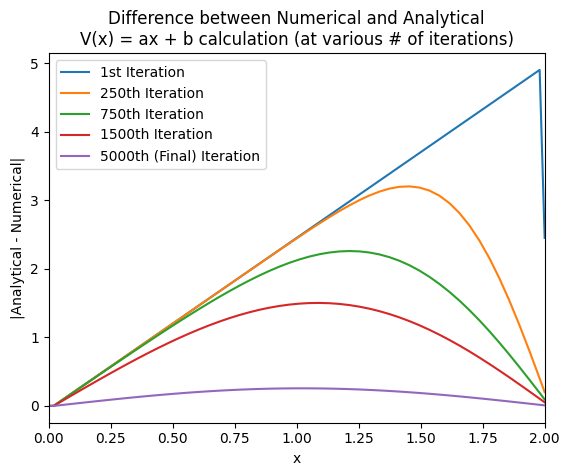

In [2]:
#3d

#setting initial variables and lists, as well as creating the analytical method list
a = 2.5
b = 0.0
y_model = linear_model(x, (a,b))
abs_0 = []
abs_1 = []
abs_2 = []
abs_3 = []
abs_f = []

#creating 5 lists that show the absolute value difference between the analytical method and numerical method (at various # of iterations)
L = len(V) - 1
i = -1
while(i<L):
    abs_0.append(abs(y_model[i]-V_0[i]))
    abs_1.append(abs(y_model[i]-V_1[i]))
    abs_2.append(abs(y_model[i]-V_2[i]))
    abs_3.append(abs(y_model[i]-V_3[i]))
    abs_f.append(abs(y_model[i]-V[i]))
    i = i + 1

#plotting figure
plt.figure()
plt.plot(x, abs_0)
plt.plot(x, abs_1)
plt.plot(x, abs_2)
plt.plot(x, abs_3)
plt.plot(x, abs_f)
plt.xlim(0,2.0)
plt.xlabel('x')
plt.ylabel('|Analytical - Numerical|')
plt.title('Difference between Numerical and Analytical\nV(x) = ax + b calculation (at various # of iterations)')
plt.legend(['1st Iteration','250th Iteration', '750th Iteration','1500th Iteration','5000th (Final) Iteration'])
plt.show()

Above is a figure showing the absolute difference between the analytical method and the numerical method. As can be seen, when the # of iterations is low, the amount of difference is very large, however as we increase the # of iterations, the better the model becomes. Again, as discussed above, if the # of iterations were to be increased to say 10 000, we would expect the last line to be nearly perfectly horizontal along the x-axis, i.e. indicating a very low absolute difference between the two methods.

Overall, we'd say our numerical solution is very similar to the analytical solution. It could be improved, especially around the 1.00 point on the x-axis where there is a slight curve on the absolute difference figure, but overall this produced a pretty accurate result that could be improved quite easily through increasing the number of iterations.

The calculated electric potential for the point charge is: 6.299e-20 V


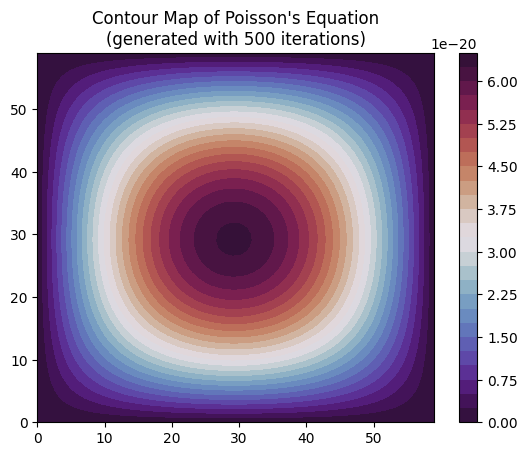

In [3]:
#3e - bonus

import numpy as np
import matplotlib.pyplot as plt

#set dimensions and maximum number of iterations
lenX = lenY = 60
delta = 1
maximumIterations = 500

#Boundary conditions
charge_top = 0
charge_bottom = 0
charge_left = 0
charge_right = 0

#Intitial Charge
q = 1.609e-19 #charge of 1 electron

#set colour interpolation (mapping)
colorinterpolation = 30 #arbitrarily set to 30 because i think the final result looked pretty
colourMap = plt.cm.twilight_shifted #i also liked this colormap

#set meshgrid
X, Y = np.meshgrid(np.arange(0,lenX), np.arange(0,lenY))

#set an array to store charge values at each point of the mesh
C = np.empty((lenX, lenY))
C.fill(q) #this fills eniter "C" array with the initial charge

#setting boundary conditions in "C" array
C[(lenY-1):, :] = charge_top #this sets top row to charge_top
C[:1, :] = charge_bottom #this sets bottom row to charge_bottom
C[:, (lenX-1):] = charge_right #this sets right column to charge_right
C[:, :1] = charge_left #this sets left column to charge_right

#iteration that will solve the Laplace equation for Poisson's equation
for iteration in range(0, maximumIterations):
    for i in range(1,lenX-1, delta):
        for j in range(1, lenY-1, delta):
            C[i,j] =  (C[i+1,j] + C[i-1,j] + C[i,j+1] + C[i,j-1])/4 #average of the 4 terms, finding average of all neighbouring terms
            #very similar algorithmn that we used to solve this in 1D, just also taking into account the y-axis neighbours
print("The calculated electric potential for the point charge is: %0.3e V"%C[30,30])
plt.figure()
plt.title("Contour Map of Poisson's Equation\n(generated with %i iterations)"%maximumIterations)
plt.contourf(X, Y, C, colorinterpolation, cmap=colourMap)
plt.colorbar()
plt.show()

Note: the code above is heavily inspired from "temperature_metal_plate_demo.ipynb" notebook done in class. We copied it and made some modifications to fit this situation.

The above figure is depicting the Poisson Equation for a point charge q in a box with dimensions L x L. We decided to use the standard charge for an electron, 1.609e-19 C for this simulation. The x-axis and y-axis are arbitrarily set to a length of 60 each to make a square figure. The Z-axis (for the contour plot) was generated using a modified version of Equation (26) from the lab manual. The major difference between the original equation and the one used includes the fact that we are now taking the y-axis neighbours into account for each point, not just the x-axis neighbours. This also means that to find the average, instead of dividing by 2 like before, we now have to divide by 4.

This generation requried a few steps. First, the L x L grid was created (L=60, as discussed above). Every point on this grid was initially assigned to be equal to the charge of the electron, q. Then the boundary conditions were put in place, making the entire outline (i.e. top/bottom rows and left/right columns) all equal to 0. Finally, the modified algorithm from Equation (26) is used to find the average of the neighbours for every single point. This will create "rings" that increase in magnitude until finally reaching the centermost point. The centermost point is the solution to Poisson's Equation numerically. As discussed in greater detail in 3a-d, increasing the # of iterations will improve the answer of the numerical solution immensely.

The numerical solution to Poisson's Equation for electric potential of an electron (when 500 iterations are done) is roughly equivalent to 6.299e-20 V.